# Methods for 1D Advection

Copyright (C) 2010-2020 Luke Olson<br>
Copyright (C) 2020 Andreas Kloeckner

<details>
<summary>MIT License</summary>
Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
THE SOFTWARE.
</details>

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Problem Description

We will set up the problem for
$$ u_t + u u_x = 0$$
with periodic BC on the interval $[0,1]$.

In [2]:
c = 1.0
T = 1.0 / c # end time

## Set up the Grid

- `dx` will be the grid spacing in the $x$-direction
- `x` will be the grid coordinates
- `xx` will be really fine grid coordinates

In [3]:
nx = 82
x = np.linspace(0, 1, nx, endpoint=False)
dx = x[1] - x[0]
xx = np.linspace(0, 1, 1000, endpoint=False)

Now define an initial condition:

In [4]:
def f(x):
    u = np.zeros(x.shape)
    u[np.intersect1d(np.where(x>0.4), np.where(x<0.6))] = 1.0
    return u

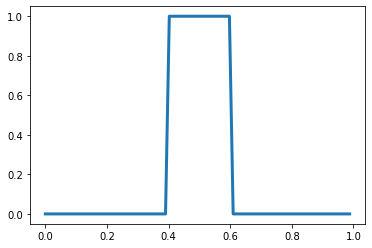

In [5]:
plt.plot(x, f(x), lw=3, clip_on=False)

## Setting the Time Step

Have spatial grid. Now we need a time step. So define a ratio parameter $\lambda$. Let
$$ \Delta t = \Delta x \frac{\lambda}{c}$$

In [6]:
lmbda = 0.93 * np.sign(c)
dt = dx * lmbda / abs(c)
nt = int(T/dt)
print('T = %g' % T)
print('tsteps = %d' % nt)
print('    dx = %g' % dx)
print('    dt = %g' % dt)
print('lambda = %g' % lmbda)

T = 1
tsteps = 88
    dx = 0.0121951
    dt = 0.0113415
lambda = 0.93


Now make an index list, called $J$, so that we can access $J+1$ and $J-1$ easily

In [7]:
J = np.arange(0, nx - 1)  # all vertices
Jm1 = np.roll(J, 1)
Jp1 = np.roll(J, -1)

## Run and Animate

Experiments:

- Try different values of $\lambda$.
- Try all the methods.

In [9]:
import time

plotit = True
u = f(x)

fig = plt.figure(figsize=(10,10))
plt.title('u vs x')
line2, = plt.plot(x, u, lw=3, clip_on=False)
        
def timestepper(n):
    # ETBS
    u[J] = u[J] - lmbda * u[J] * (u[J] - u[Jm1])
    
    uex = f((xx - c * (n+1) * dt) % 1.0)
        
    line2.set_data(x, u)
    
    return line2

from matplotlib import animation
from IPython.display import HTML

ani = animation.FuncAnimation(fig, timestepper, frames=nt, interval=30)
html = HTML(ani.to_jshtml())
plt.clf()
html

<Figure size 720x720 with 0 Axes>